In [ ]:
!pip install imblearn

In [2]:
import pandas as pd
import pickle
import seaborn as sns

from collections import Counter

from imblearn.combine import SMOTETomek
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from xgboost import XGBClassifier

In [3]:
df = pd.read_csv('../data/final_data.csv', index_col=[0])
df.head()

,Glucose,Insulin,BMI,Age,Outcome
0,148.0,125.0,33.6,50,1
1,85.0,125.0,26.6,31,0
2,183.0,125.0,23.3,32,1
3,89.0,94.0,28.1,21,0
4,137.0,168.0,43.1,33,1


In [4]:
df.tail()

,Glucose,Insulin,BMI,Age,Outcome
763,101.0,180.0,32.9,63,0
764,122.0,125.0,36.8,27,0
765,121.0,112.0,26.2,30,0
766,126.0,125.0,30.1,47,1
767,93.0,125.0,30.4,23,0


<Axes: xlabel='Outcome', ylabel='count'>

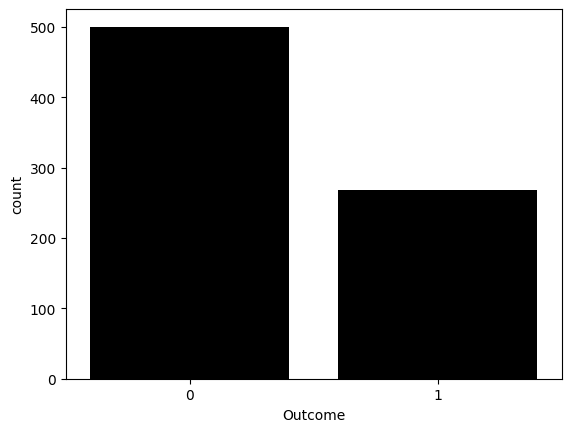

In [5]:
# check for imbalancing
sns.countplot(x='Outcome', data=df, color='Black', stat='count')

# Handling imbalancing

* Oversampling minority class

In [6]:
# split dataset
x = df.drop(["Outcome"],axis = 1)
x.head()

,Glucose,Insulin,BMI,Age
0,148.0,125.0,33.6,50
1,85.0,125.0,26.6,31
2,183.0,125.0,23.3,32
3,89.0,94.0,28.1,21
4,137.0,168.0,43.1,33


In [7]:
y = df.Outcome
y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [8]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=300)

In [9]:
print("Before oversampling: ", Counter(y_train))
smotm = SMOTETomek(random_state=139)
X_train_smotm, y_train_smotm = smotm.fit_resample(X_train, y_train)
print("After oversampling: ", Counter(y_train_smotm))

Before oversampling:  Counter({0: 399, 1: 215})
After oversampling:  Counter({0: 374, 1: 374})


In [10]:
X_test

,Glucose,Insulin,BMI,Age
357,129.0,125.0,39.9,44
298,100.0,184.0,36.6,46
549,189.0,125.0,28.5,37
287,119.0,220.0,45.6,29
582,121.0,125.0,26.5,62
...,...,...,...,...
642,147.0,125.0,29.5,50
477,114.0,110.0,23.8,31
81,74.0,125.0,32.3,22
423,115.0,125.0,30.8,21


In [11]:
y_test

357    1
298    1
549    0
287    1
582    0
      ..
642    1
477    0
81     0
423    0
693    1
Name: Outcome, Length: 154, dtype: int64

## Making Classifiers

In [12]:
# random forest
rfc = RandomForestClassifier(n_estimators=100, criterion='entropy')
rfc.fit(X_train_smotm, y_train_smotm)
predictions = rfc.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7987012987012987
Classification report
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       101
           1       0.72      0.68      0.70        53

    accuracy                           0.80       154
   macro avg       0.78      0.77      0.77       154
weighted avg       0.80      0.80      0.80       154



In [13]:
# xgboost
xgb_model = XGBClassifier(gamma=5, objective="binary:logistic", reg_alpha=0.85)
xgb_model.fit(X_train_smotm, y_train_smotm)
predictions = xgb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.8376623376623377
Classification report
               precision    recall  f1-score   support

           0       0.89      0.86      0.87       101
           1       0.75      0.79      0.77        53

    accuracy                           0.84       154
   macro avg       0.82      0.83      0.82       154
weighted avg       0.84      0.84      0.84       154



`gamma`, `objective`, and `reg_alpha` are parameters of the XGBoost classifier. All XGBoost Classifier parameters are detailed [here](https://github.com/singhdivyank/Data-Science-CheatSheets/blob/main/Machine%20Learning/XGBoost_hyperparameters.jpeg)

In [14]:
# svm
svc_model = SVC(kernel='poly', gamma='scale')
svc_model.fit(X_train_smotm, y_train_smotm)
predictions = svc_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7662337662337663
Classification report
               precision    recall  f1-score   support

           0       0.82      0.83      0.82       101
           1       0.67      0.64      0.65        53

    accuracy                           0.77       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154



In [15]:
# naive baise
nb_model = GaussianNB()
nb_model.fit(X_train_smotm, y_train_smotm)
predictions = nb_model.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7857142857142857
Classification report
               precision    recall  f1-score   support

           0       0.83      0.85      0.84       101
           1       0.70      0.66      0.68        53

    accuracy                           0.79       154
   macro avg       0.76      0.76      0.76       154
weighted avg       0.78      0.79      0.78       154



In [16]:
# logistic regression
lr = LogisticRegression(random_state=0, multi_class='ovr', solver='liblinear')
lr.fit(X_train_smotm, y_train_smotm)
predictions = lr.predict(X_test)

print("Testing accuracy: ", accuracy_score(y_true=y_test, y_pred=predictions))
print("Classification report\n", classification_report(y_true=y_test, y_pred=predictions))

Testing accuracy:  0.7532467532467533
Classification report
               precision    recall  f1-score   support

           0       0.82      0.80      0.81       101
           1       0.64      0.66      0.65        53

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.76      0.75      0.75       154



# Saving model

In [17]:
model = pickle.dump(xgb_model, open('classifier.pkl', 'wb'))

In [18]:
classifier = pickle.load(open('classifier.pkl', 'rb'))

# Making Predictions

In [19]:
# making predictions
classifier.predict(X_test)

array([1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1])

In [20]:
classifier.predict([[183, 0, 23.3, 32]])[0] # patient3

1

In [21]:
classifier.predict([[121, 112, 26.2, 30]])[0] # patient(n-2)

0